2.2.2021

From the 10k images create a folder with only the labeled images: Done

In [2]:
import os
import pandas as pd
import glob
from PIL import Image
import matplotlib.pyplot as plt

locations

In [12]:
!pwd

/home/jovyan/LFI/bainbridge_2k/preparation


In [25]:
# location of images
images_dir = '../../data/bainbridge_10k/db10k_faces/FaceImages/'

In [4]:
# location of original labels
# LFI/bainbridge_2k/meta
label_file = '../meta/labels2k.xlsx'

In [36]:
# location folder for 2k images
new_dir = '../images2/'

read the labels from file

In [16]:
dfs = pd.read_excel(label_file, sheet_name='Final Values')
dfs1 = dfs[['Filename','Gender','Age','Race']]
dfs1.head

<bound method NDFrame.head of                                     Filename  Gender       Age  Race
0         Google_1_Danielle Goble_5_oval.jpg       1  3.000000     1
1        Google_1_Phillip Owensby_9_oval.jpg       0  4.000000     1
2        Google_1_Douglas Ziegler_3_oval.jpg       1  3.166667     1
3          Google_1_Donald Sauls_11_oval.jpg       1  3.083333     2
4            Google_1_Eric Harman_5_oval.jpg       1  2.833333     6
...                                      ...     ...       ...   ...
2217  Google_1_Alison Summerville_3_oval.jpg       0  1.916667     5
2218         Google_1_Douglas Yun_3_oval.jpg       0  2.166667     3
2219       Google_1_Wayne Barrios_9_oval.jpg       1  3.083333     1
2220   Google_1_Jennie Kissinger_15_oval.jpg       0  2.500000     1
2221         Google_1_Eileen Burd_7_oval.jpg       0  2.750000     1

[2222 rows x 4 columns]>

I have already created the labels file as a csv and I have 2 versions.

labels2k.csv : original filenames with whitespaces, cf Google_1_Danielle Goble_5_oval.jpg

labels2k_ws_no.csv : filenames without whitespace, cf Google_1_DanielleGoble_5_oval.jpg

Google_1_Danielle Goble_5_oval.jpg
../../data/bainbridge_10k/db10k_faces/FaceImages/Google_1_Danielle Goble_5_oval.jpg


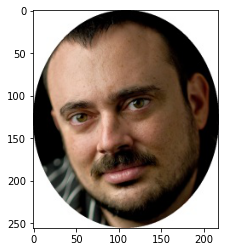

In [34]:
fn = dfs1.iloc[0].Filename
print(fn)
img_loc = os.path.join(images_dir, fn)
print(img_loc)
image = Image.open(img_loc)
plt.imshow(image)
plt.show()

How many images are in the file containing the labels? 2222! No doubles?!

In [18]:
len(dfs1.Filename)

2222

In [19]:
len(set(dfs1.Filename))

2222

In [20]:
len(pd.unique(dfs1.Filename))

2222

Going through the directory of 10k images

check if the image is in the labels file / dataframe

if so copy to directory of 2k images.

In [17]:
counter=0
for idx , fn in enumerate(glob.glob(images_dir+'*')): 
    # on UNIX    
    # os.popen('cp source.txt destination.txt') 
    # In Windows
    # os.popen('copy source.txt destination.txt')
    h , t = os.path.split(fn) # h_ead and t_ail
    cmd = 'cp \''+fn+'\' '+new_dir+t.replace(" ","")
    #print(idx , cmd , '\n')
    if t in set(dfs1.Filename):
        os.popen(cmd)
        counter+=1
        #print('copied',idx)
    if idx>11000:
        break
counter, idx

10167


(2222, 10167)

I think the above approach did not copy all 2222 images into the 2k folder.

# solution

Go through the dataframe, take the filenames from the dataframe (where also the labels are stored) and copy the file to the 2k folder.

It copied all 2222 images only after reducing the brackets in the doublettes. The filename was 'Google_Name(2).jpg' and had to become 'Google_Name2.jpg'

In [40]:
!ls $new_dir | wc -l 

42


In [46]:
!ls $new_dir | wc -l 

ct_exists=0 # file already eists
ct_cpd=0 # file copied
for idx , fn in enumerate(dfs1.Filename):
    dest = new_dir+fn.replace(" ","").replace("(2)","2") # destination
    source = os.path.join(images_dir, fn)
    cmd = 'cp \''+source+'\' '+dest # command : cp 'source' destination with source containing whitespace
    # print(cmd, '\n')
    if not os.path.exists(dest):
        os.popen(cmd)
    if idx%100==0:
        print('done with : ' , idx)
    if idx > 3000:
        break
print('final index : ' , idx)

!ls $new_dir | wc -l 

62
done with :  0
done with :  100
done with :  200
done with :  300
done with :  400
done with :  500
done with :  600
done with :  700
done with :  800
done with :  900
done with :  1000
done with :  1100
done with :  1200
done with :  1300
done with :  1400
done with :  1500
done with :  1600
done with :  1700
done with :  1800
done with :  1900
done with :  2000
done with :  2100
done with :  2200
final index :  2221
2222


## How I got there

In [40]:
!ls $images_dir | wc -l


10168


In [48]:
!ls $images_dir | grep '(2)' #| wc -l

Google_1_Carole Deaver_1_oval (2).jpg
Google_1_Cecilia Coston_3_oval (2).jpg
Google_1_Charles Sampson_5_oval (2).jpg
Google_1_Cynthia Futrell_1_oval (2).jpg
Google_1_Cynthia Tejada_5_oval (2).jpg
Google_1_Debbie Dicken_1_oval (2).jpg
Google_1_Diana Galvan_1_oval (2).jpg
Google_1_Dianne Beaumont_3_oval (2).jpg
Google_1_Douglas Quach_5_oval (2).jpg
Google_1_Edward Infante_5_oval (2).jpg
Google_1_Ellen Singer_1_oval (2).jpg
Google_1_Ethel Stanford_1_oval (2).jpg
Google_1_Lawrence Spalding_1_oval (2).jpg
Google_1_Leonard Leatherwood_1_oval (2).jpg
Google_1_Louis Braswell_9_oval (2).jpg
Google_1_Lucy Gray_3_oval (2).jpg
Google_1_Martha Kiely_3_oval (2).jpg
Google_1_Marvin Lavergne_5_oval (2).jpg
Google_1_Megan Ballard_3_oval (2).jpg
Google_1_Michele Friedman_3_oval (2).jpg
Google_1_Mike Hake_3_oval (2).jpg
Google_1_Nathan Kell_5_oval (2).jpg
Google_1_Nathan Kiger_7_oval (2).jpg
Google_1_Nathan Overby_1_oval (2).jpg
Google_1_Nicholas Turk_3_oval (2).jpg
Google_1_Norman Westfall_9_oval (2).jp

There seem to be doubles.

In [49]:
os.path.exists(images_dir+'Google_1_Carole Deaver_1_oval.jpg')

True

In [50]:
os.path.exists(images_dir+'Google_1_Carole Deaver_1_oval (2).jpg')

True

Is it the same image? Then remove the double. 

Is it a different image? Then keep and possibly rename it.

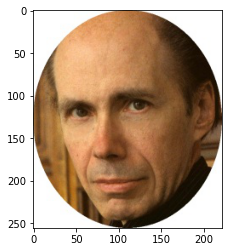

In [53]:
fn = 'Google_1_Carole Deaver_1_oval (2).jpg'
img_loc = os.path.join(images_dir, fn)
image = Image.open(img_loc)
plt.imshow(image)
plt.show()

Same person, slightly different images

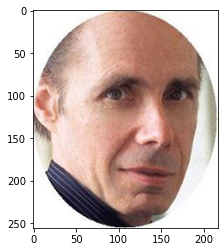

In [54]:
fn = 'Google_1_Carole Deaver_1_oval.jpg'
img_loc = os.path.join(images_dir, fn)
image = Image.open(img_loc)
plt.imshow(image)
plt.show()

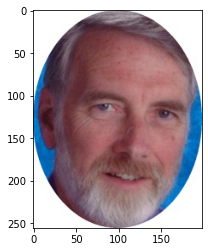

In [55]:
fn = 'Google_1_Timothy Pollard_5_oval (2).jpg'
img_loc = os.path.join(images_dir, fn)
image = Image.open(img_loc)
plt.imshow(image)
plt.show()

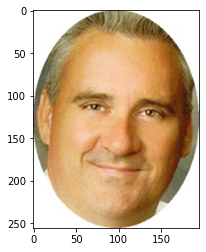

In [57]:
fn = 'Google_1_Timothy Pollard_5_oval.jpg'
img_loc = os.path.join(images_dir, fn)
image = Image.open(img_loc)
plt.imshow(image)
plt.show()

May be the same person ... the nose looks different. Age difference, but one may be an old photo of the same person. Then it doesn't matter for our purpose, then it is basically. different person.

So we keep the doubles.

Looking for filenames with (2).jpg ending

In [32]:
import numpy as np

# search_for = 'Google_1_Danielle Goble'
search_for = '(2)'

dfs1['srtd']= dfs1['Filename'].str.find(search_for) # srtd : sorted
dfs1.sort_values('srtd', ascending=False)[:20]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Filename,Gender,Age,Race,srtd
1471,Google_1_Michele Friedman_3_oval (2).jpg,0,2.000000,1,33
613,Google_1_Raymond Sheridan_1_oval (2).jpg,1,2.250000,1,33
1858,Google_1_Theresa Forsberg_3_oval (2).jpg,0,3.166667,3,33
2030,Google_1_Charles Sampson_5_oval (2).jpg,1,2.500000,2,32
559,Google_1_Marvin Lavergne_5_oval (2).jpg,0,2.916667,5,32
1859,Google_1_Rachel Espinosa_7_oval (2).jpg,0,1.833333,1,32
185,Google_1_Ralph Claypool_1_oval (2).jpg,1,4.000000,1,31
318,Google_1_Cynthia Tejada_5_oval (2).jpg,1,3.500000,1,31
382,Google_1_Steven Dorris_5_oval (2).jpg,0,2.583333,1,30
183,Google_1_Diana Galvan_1_oval (2).jpg,1,4.166667,1,29


# Create a new file for the labels
whitespaces have been removed and brackets for the doubles: (2).jpg becme 2.jpg

the new labels file will be a csv.

In [8]:
dfs = pd.read_excel(label_file, sheet_name='Final Values')
dfs1 = dfs[['Filename','Gender','Age','Race']]
dfs1.head

<bound method NDFrame.head of                                     Filename  Gender       Age  Race
0         Google_1_Danielle Goble_5_oval.jpg       1  3.000000     1
1        Google_1_Phillip Owensby_9_oval.jpg       0  4.000000     1
2        Google_1_Douglas Ziegler_3_oval.jpg       1  3.166667     1
3          Google_1_Donald Sauls_11_oval.jpg       1  3.083333     2
4            Google_1_Eric Harman_5_oval.jpg       1  2.833333     6
...                                      ...     ...       ...   ...
2217  Google_1_Alison Summerville_3_oval.jpg       0  1.916667     5
2218         Google_1_Douglas Yun_3_oval.jpg       0  2.166667     3
2219       Google_1_Wayne Barrios_9_oval.jpg       1  3.083333     1
2220   Google_1_Jennie Kissinger_15_oval.jpg       0  2.500000     1
2221         Google_1_Eileen Burd_7_oval.jpg       0  2.750000     1

[2222 rows x 4 columns]>

In [13]:
dfs2 = dfs1.copy()

for idx , fn in enumerate(dfs1.Filename):
    fn_new = dfs1.iloc[idx].Filename.replace(" ","").replace("(2)","2")
    dfs2.loc[idx, 'Filename'] = fn_new
dfs2

,Filename,Gender,Age,Race
0,Google_1_DanielleGoble_5_oval.jpg,1,3.000000,1
1,Google_1_PhillipOwensby_9_oval.jpg,0,4.000000,1
2,Google_1_DouglasZiegler_3_oval.jpg,1,3.166667,1
3,Google_1_DonaldSauls_11_oval.jpg,1,3.083333,2
4,Google_1_EricHarman_5_oval.jpg,1,2.833333,6
...,...,...,...,...
2217,Google_1_AlisonSummerville_3_oval.jpg,0,1.916667,5
2218,Google_1_DouglasYun_3_oval.jpg,0,2.166667,3
2219,Google_1_WayneBarrios_9_oval.jpg,1,3.083333,1
2220,Google_1_JennieKissinger_15_oval.jpg,0,2.500000,1


In [14]:
dfs2.to_csv('labels2k.csv')